/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


            new_cases  new_cases_smoothed
Date                                     
2020-07-01      46712           37160.286
2020-07-02      48105           38392.000
2020-07-03      42223           37729.571
2020-07-04      37923           37619.571
2020-07-05      26051           36987.429
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 335 entries, 2020-07-01 to 2021-05-31
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   new_cases           335 non-null    int64  
 1   new_cases_smoothed  335 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB
None


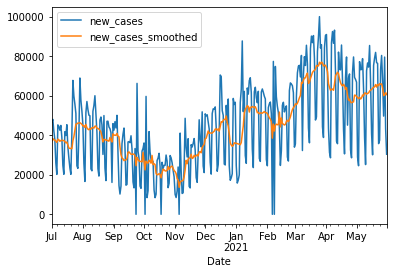

In [8]:
#read csv
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
	return datetime.strptime('202'+x, '%Y-%m-%d')
 
series = read_csv('https://raw.githubusercontent.com/ll-cooool-j/DS-Assignment/main/Datasets/Datasets%20for%20ARIMA%20(Only%20Date%20%2B%20Confirmed)/Brazil%20(Date%20%2B%20New%20Cases%20%2B%20Smoothed%20New%20Cases).csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
print(series.info())
series.plot()
pyplot.show()

#we only use the raw data so we drop the smoothed data attribute out
series = series.drop(columns =['new_cases_smoothed'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Observations: 115
Training Observations: 60
Testing Observations: 55
Observations: 170
Training Observations: 115
Testing Observations: 55
Observations: 225
Training Observations: 170
Testing Observations: 55
Observations: 280
Training Observations: 225
Testing Observations: 55
Observations: 335
Training Observations: 280
Testing Observations: 55


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with differe

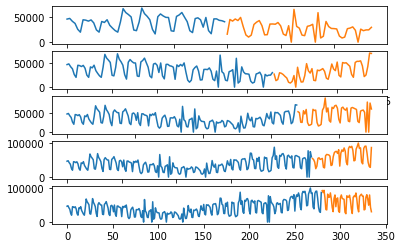

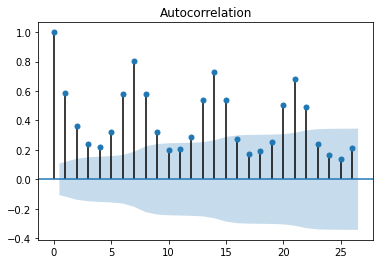

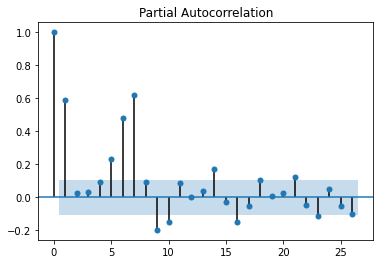

In [2]:
#Implementation of rolling-forward validation train-test split
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
X = series.values
splits = TimeSeriesSplit(n_splits=5)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))
	pyplot.subplot(510 + index)
	pyplot.plot(train)
	pyplot.plot([None for i in train] + [x for x in test])
	index += 1
pyplot.show()

#Plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series)
pyplot.show()
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series)
pyplot.show()

In [3]:
#split dataset into two subsets and calculate the mean
X = series.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
print('mean1=%f, mean2=%f' % (mean1, mean2))

mean1=33142.815476, mean2=57338.443114


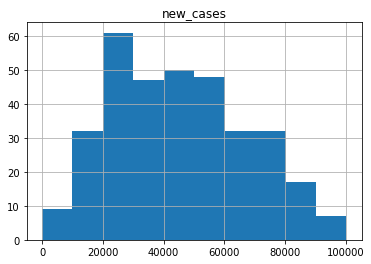

In [4]:
#check distribution of raw data set
series.hist()
pyplot.show()

In [5]:
#define function for ADF test (check stationarity)
import pandas as pd
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(series['new_cases'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.099912
p-value                          0.715107
#Lags Used                      17.000000
Number of Observations Used    317.000000
Critical Value (1%)             -3.451148
Critical Value (5%)             -2.870701
Critical Value (10%)            -2.571651
dtype: float64


[1.16098711]


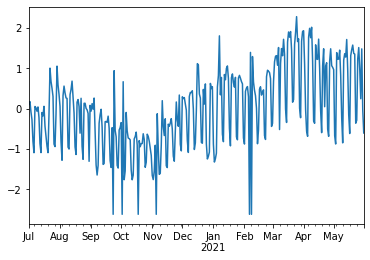

In [19]:
#Power transformation to achieve stationarity as far as possible
import numpy as np
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
pt.fit(series)
print(pt.lambdas_)
series['y'] = pt.transform(series)
series['y'].plot()


In [17]:
#make sure to drop NaN or inf values
series = series.drop(columns = ['new_cases'])
series.dropna(inplace=True)
print(series.head())
print(series.info())

                   y
Date                
2020-07-01  0.165497
2020-07-02  0.223410
2020-07-03 -0.025584
2020-07-04 -0.215717
2020-07-05 -0.787215
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 335 entries, 2020-07-01 to 2021-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       335 non-null    float64
dtypes: float64(1)
memory usage: 5.2 KB
None


In [18]:
# grid search ARIMA parameters for the whole dataset (with 280 training observations and 55 testing observations)
import warnings
import pandas as pd
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
  X = X.astype('float64')
  # prepare training dataset
  train, test = X[:60], X[60:115] 
  history = [x for x in train]

  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 # load dataset
idx = pd.date_range("2020-07-01", periods=335)
series.index = idx.to_period()
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


ARIMA(0, 0, 0) RMSE=0.960
ARIMA(0, 0, 1) RMSE=0.993
ARIMA(0, 0, 3) RMSE=1.020
ARIMA(0, 1, 0) RMSE=1.183
ARIMA(0, 1, 1) RMSE=0.949
ARIMA(0, 1, 2) RMSE=0.921
ARIMA(0, 1, 3) RMSE=0.935
ARIMA(0, 2, 0) RMSE=2.074
ARIMA(0, 2, 1) RMSE=1.197
ARIMA(1, 0, 0) RMSE=0.955
ARIMA(1, 1, 0) RMSE=1.085
ARIMA(1, 2, 0) RMSE=1.553
ARIMA(2, 0, 0) RMSE=1.007
ARIMA(2, 1, 0) RMSE=1.097
ARIMA(2, 2, 0) RMSE=1.433
Best ARIMA(0, 1, 2) RMSE=0.921


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  334
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -389.064
Method:                       css-mle   S.D. of innovations              0.774
Date:                Sat, 17 Jul 2021   AIC                            786.128
Time:                        01:19:36   BIC                            801.372
Sample:                    07-02-2020   HQIC                           792.206
                         - 05-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.004      0.723      0.470      -0.005       0.010
ma.L1.D.y     -0.6679      0.051    -13.208      0.000      -0.767      -0.569
ma.L2.D.y     -0.2435      0.049     -4.961      0.0

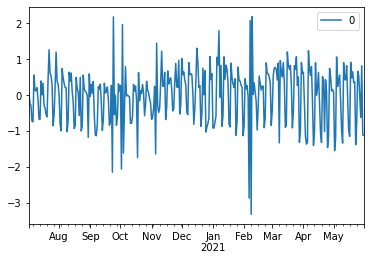

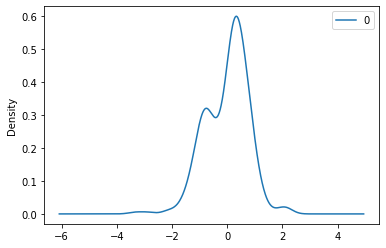

                0
count  334.000000
mean    -0.003663
std      0.775374
min     -3.325013
25%     -0.601491
50%      0.158513
75%      0.513665
max      2.188553
predicted=-0.108977, expected=-1.306996
predicted=-0.888906, expected=0.078783
predicted=0.357624, expected=-0.064134
predicted=-0.365398, expected=0.120727
predicted=0.097041, expected=-0.015825
predicted=-0.189248, expected=0.259303
predicted=0.112553, expected=-0.571034
predicted=-0.456507, expected=-1.396816
predicted=-0.655176, expected=-1.646160
predicted=-0.780184, expected=-1.410348
predicted=-0.662716, expected=-0.363842
predicted=-0.188675, expected=-0.155560
predicted=-0.335237, expected=-0.018208
predicted=-0.171164, expected=-0.466079
predicted=-0.503559, expected=-1.383076
predicted=-0.867209, expected=-1.361685
predicted=-0.710547, expected=-0.326801
predicted=-0.240617, expected=-0.319426
predicted=-0.500790, expected=-0.342274
predicted=-0.369932, expected=-0.188728
predicted=-0.350511, expected=-0.487008
pred

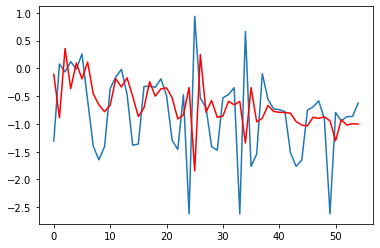

In [21]:
# fit an ARIMA model and plot residual errors
from pandas import DataFrame

# fit model
series = series.astype('float64')
model = ARIMA(series, order=(0,1,2))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np
import itertools
from itertools import chain
X = series.values.astype('float64')

# prepare training dataset (60 training observations and 55 testing observations)
train, test = X[:60], X[60:115] 
history = [x for x in train]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('MAE score: %.3f' % mae)
r2 = r2_score(test, predictions)
print('R2 score: %.3f' % r2)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [28]:
# grid search ARIMA parameters for the whole dataset (with 280 training observations and 55 testing observations)
import warnings
import pandas as pd
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
  X = X.astype('float64')
  # prepare training dataset
  train, test = X[:115], X[115:170] 
  history = [x for x in train]

  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 # load dataset
idx = pd.date_range("2020-07-01", periods=335)
series.index = idx.to_period()
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)


ARIMA(0, 0, 0) RMSE=0.758
ARIMA(0, 0, 1) RMSE=0.678
ARIMA(0, 0, 2) RMSE=0.672
ARIMA(0, 0, 3) RMSE=0.668
ARIMA(0, 1, 0) RMSE=0.723
ARIMA(0, 1, 1) RMSE=0.690
ARIMA(0, 1, 2) RMSE=0.670
ARIMA(0, 2, 0) RMSE=1.131
ARIMA(0, 2, 1) RMSE=0.728
ARIMA(1, 0, 0) RMSE=0.663
ARIMA(1, 1, 0) RMSE=0.714
ARIMA(1, 2, 0) RMSE=0.990
ARIMA(2, 0, 0) RMSE=0.665
ARIMA(2, 1, 0) RMSE=0.690
ARIMA(2, 2, 0) RMSE=0.885
Best ARIMA(1, 0, 0) RMSE=0.663


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  334
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -389.064
Method:                       css-mle   S.D. of innovations              0.774
Date:                Sat, 17 Jul 2021   AIC                            786.128
Time:                        01:43:19   BIC                            801.372
Sample:                    07-02-2020   HQIC                           792.206
                         - 05-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.004      0.723      0.470      -0.005       0.010
ma.L1.D.y     -0.6679      0.051    -13.208      0.000      -0.767      -0.569
ma.L2.D.y     -0.2435      0.049     -4.961      0.0

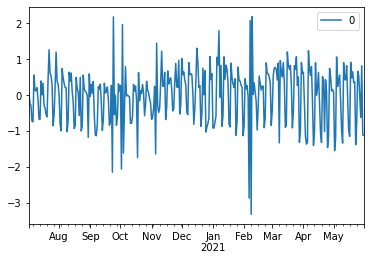

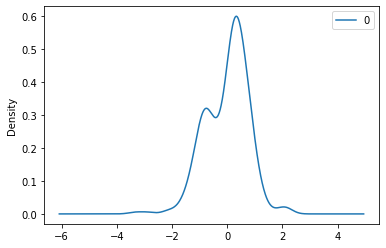

                0
count  334.000000
mean    -0.003663
std      0.775374
min     -3.325013
25%     -0.601491
50%      0.158513
75%      0.513665
max      2.188553
predicted=-0.958999, expected=-0.765994
predicted=-0.990698, expected=-1.454792
predicted=-1.121913, expected=-1.330423
predicted=-1.097659, expected=-0.635577
predicted=-0.983245, expected=-0.689006
predicted=-1.009335, expected=-0.807175
predicted=-1.025120, expected=-0.991844
predicted=-1.060137, expected=-1.159904
predicted=-1.094225, expected=-1.656943
predicted=-1.199888, expected=-1.759643
predicted=-1.230830, expected=-1.550802
predicted=-1.212989, expected=-0.909111
predicted=-1.106380, expected=-2.619489
predicted=-1.467962, expected=-0.129464
predicted=-1.018879, expected=-0.987014
predicted=-1.194394, expected=-1.628769
predicted=-1.277761, expected=-1.606520
predicted=-1.284746, expected=-0.909256
predicted=-1.189545, expected=0.194707
predicted=-1.009355, expected=-0.448202
predicted=-1.113328, expected=-0.668603

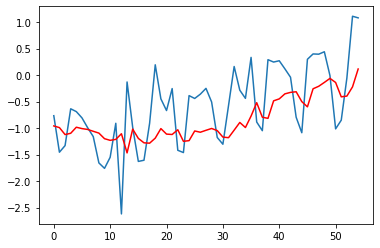

In [29]:
# fit an ARIMA model and plot residual errors
from pandas import DataFrame

# fit model
series = series.astype('float64')
model = ARIMA(series, order=(0,1,2))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np
import itertools
from itertools import chain
X = series.values.astype('float64')

# prepare training dataset (115 training observations and 55 testing observations)
train, test = X[:115], X[115:170] 
history = [x for x in train]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('MAE score: %.3f' % mae)
r2 = r2_score(test, predictions)
print('R2 score: %.3f' % r2)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [24]:
# grid search ARIMA parameters for the whole dataset (with 280 training observations and 55 testing observations)
import warnings
import pandas as pd
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
  X = X.astype('float64')
  # prepare training dataset
  train, test = X[:170], X[170:225] 
  history = [x for x in train]

  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 # load dataset
idx = pd.date_range("2020-07-01", periods=335)
series.index = idx.to_period()
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1.074
ARIMA(0, 0, 1) RMSE=1.068
ARIMA(0, 0, 2) RMSE=1.017
ARIMA(0, 0, 3) RMSE=1.008
ARIMA(0, 1, 0) RMSE=1.293
ARIMA(0, 1, 1) RMSE=0.988
ARIMA(0, 1, 2) RMSE=1.002
ARIMA(0, 1, 3) RMSE=1.001
ARIMA(0, 2, 0) RMSE=2.248
ARIMA(0, 2, 1) RMSE=1.300
ARIMA(1, 0, 0) RMSE=1.041
ARIMA(1, 0, 1) RMSE=1.009
ARIMA(1, 0, 2) RMSE=1.001
ARIMA(1, 0, 3) RMSE=1.001
ARIMA(1, 1, 0) RMSE=1.137
ARIMA(1, 1, 2) RMSE=1.006
ARIMA(1, 1, 3) RMSE=1.032
ARIMA(1, 2, 0) RMSE=1.481
ARIMA(2, 0, 0) RMSE=1.033
ARIMA(2, 0, 1) RMSE=0.993
ARIMA(2, 0, 2) RMSE=0.947
ARIMA(2, 1, 0) RMSE=1.162
ARIMA(2, 1, 2) RMSE=1.004
ARIMA(2, 2, 0) RMSE=1.451
Best ARIMA(2, 0, 2) RMSE=0.947


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  334
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -389.064
Method:                       css-mle   S.D. of innovations              0.774
Date:                Sat, 17 Jul 2021   AIC                            786.128
Time:                        01:43:34   BIC                            801.372
Sample:                    07-02-2020   HQIC                           792.206
                         - 05-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.004      0.723      0.470      -0.005       0.010
ma.L1.D.y     -0.6679      0.051    -13.208      0.000      -0.767      -0.569
ma.L2.D.y     -0.2435      0.049     -4.961      0.0

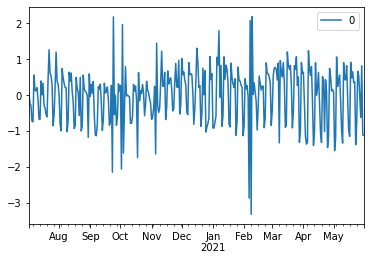

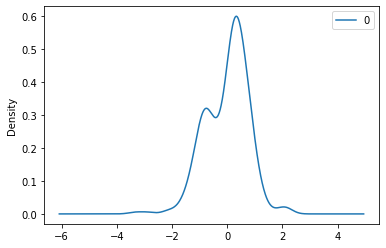

                0
count  334.000000
mean    -0.003663
std      0.775374
min     -3.325013
25%     -0.601491
50%      0.158513
75%      0.513665
max      2.188553
predicted=0.184931, expected=0.360844
predicted=0.067252, expected=0.259902
predicted=0.099079, expected=-0.838579
predicted=-0.235769, expected=-0.858925
predicted=-0.259242, expected=0.473526
predicted=0.091235, expected=0.110475
predicted=-0.042300, expected=0.609317
predicted=0.159817, expected=-0.878300
predicted=-0.279148, expected=-1.248799
predicted=-0.391236, expected=-1.184124
predicted=-0.454427, expected=-1.078288
predicted=-0.494356, expected=0.621471
predicted=-0.009250, expected=0.492406
predicted=-0.077250, expected=0.539787
predicted=0.019531, expected=-0.878780
predicted=-0.399116, expected=-1.324929
predicted=-0.515012, expected=-1.243769
predicted=-0.558639, expected=-1.105712
predicted=-0.583336, expected=0.534524
predicted=-0.086175, expected=0.817746
predicted=-0.028214, expected=1.799913
predicted=0.407

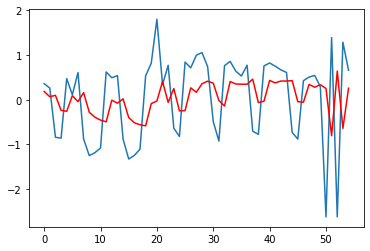

In [30]:
# fit an ARIMA model and plot residual errors
from pandas import DataFrame

# fit model
series = series.astype('float64')
model = ARIMA(series, order=(0,1,2))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np
import itertools
from itertools import chain
X = series.values.astype('float64')

# prepare training dataset (170 training observations and 55 testing observations)
train, test = X[0:170], X[170:225] 
history = [x for x in train]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('MAE score: %.3f' % mae)
r2 = r2_score(test, predictions)
print('R2 score: %.3f' % r2)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [26]:
# grid search ARIMA parameters for the whole dataset (with 280 training observations and 55 testing observations)
import warnings
import pandas as pd
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
  X = X.astype('float64')
  # prepare training dataset
  train, test = X[:225], X[225:280] 
  history = [x for x in train]

  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 # load dataset
idx = pd.date_range("2020-07-01", periods=335)
series.index = idx.to_period()
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1.343
ARIMA(0, 0, 1) RMSE=1.096
ARIMA(0, 0, 2) RMSE=1.008
ARIMA(0, 0, 3) RMSE=0.918
ARIMA(0, 1, 0) RMSE=0.870
ARIMA(0, 1, 1) RMSE=0.844
ARIMA(0, 1, 2) RMSE=0.795
ARIMA(0, 1, 3) RMSE=0.797
ARIMA(0, 2, 0) RMSE=1.180
ARIMA(0, 2, 1) RMSE=0.875
ARIMA(1, 0, 0) RMSE=0.959
ARIMA(1, 0, 1) RMSE=0.861
ARIMA(1, 0, 2) RMSE=0.814
ARIMA(1, 0, 3) RMSE=0.817
ARIMA(1, 1, 0) RMSE=0.928
ARIMA(1, 1, 2) RMSE=0.794
ARIMA(1, 1, 3) RMSE=0.795
ARIMA(1, 2, 0) RMSE=1.236
ARIMA(2, 0, 0) RMSE=0.944
ARIMA(2, 0, 1) RMSE=0.816
ARIMA(2, 0, 2) RMSE=0.925
ARIMA(2, 1, 0) RMSE=0.920
ARIMA(2, 1, 2) RMSE=0.702
ARIMA(2, 2, 0) RMSE=1.181
Best ARIMA(2, 1, 2) RMSE=0.702


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  334
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -389.064
Method:                       css-mle   S.D. of innovations              0.774
Date:                Sat, 17 Jul 2021   AIC                            786.128
Time:                        01:43:48   BIC                            801.372
Sample:                    07-02-2020   HQIC                           792.206
                         - 05-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.004      0.723      0.470      -0.005       0.010
ma.L1.D.y     -0.6679      0.051    -13.208      0.000      -0.767      -0.569
ma.L2.D.y     -0.2435      0.049     -4.961      0.0

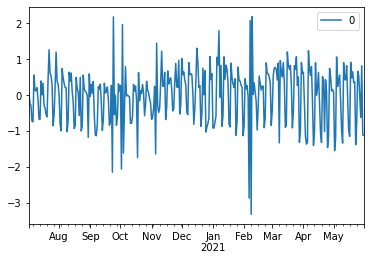

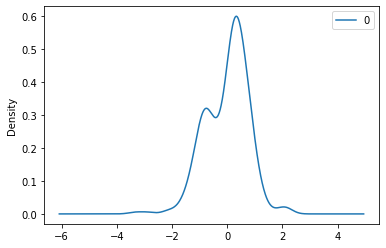

                0
count  334.000000
mean    -0.003663
std      0.775374
min     -3.325013
25%     -0.601491
50%      0.158513
75%      0.513665
max      2.188553
predicted=0.133731, expected=0.454077
predicted=0.158348, expected=0.318352
predicted=0.155076, expected=0.006954
predicted=0.103136, expected=-0.871385
predicted=-0.095823, expected=-0.525781
predicted=-0.067602, expected=0.476442
predicted=0.113328, expected=0.539493
predicted=0.141342, expected=0.332541
predicted=0.130390, expected=0.404934
predicted=0.169296, expected=0.462451
predicted=0.201529, expected=-0.670635
predicted=-0.034063, expected=-0.765665
predicted=-0.086501, expected=0.788109
predicted=0.213254, expected=0.948022
predicted=0.268540, expected=0.923759
predicted=0.323195, expected=0.889609
predicted=0.367881, expected=0.741872
predicted=0.379564, expected=-0.443504
predicted=0.132821, expected=-0.367124
predicted=0.131905, expected=0.671965
predicted=0.333723, expected=1.156957
predicted=0.456232, expected=1

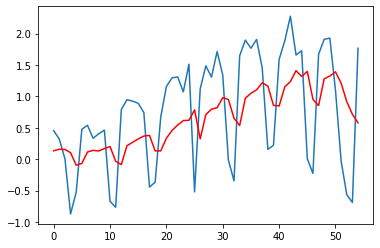

In [31]:
# fit an ARIMA model and plot residual errors
from pandas import DataFrame

# fit model
series = series.astype('float64')
model = ARIMA(series, order=(0,1,2))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np
import itertools
from itertools import chain
X = series.values.astype('float64')

# prepare training dataset (225 training observations and 55 testing observations)
train, test = X[:225], X[225:280] 
history = [x for x in train]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('MAE score: %.3f' % mae)
r2 = r2_score(test, predictions)
print('R2 score: %.3f' % r2)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [27]:
# grid search ARIMA parameters for the whole dataset (with 280 training observations and 55 testing observations)
import warnings
import pandas as pd
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
  X = X.astype('float64')
  # prepare training dataset
  train, test = X[:280], X[280:] 
  history = [x for x in train]

  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 # load dataset
idx = pd.date_range("2020-07-01", periods=335)
series.index = idx.to_period()
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1.195
ARIMA(0, 0, 1) RMSE=0.955
ARIMA(0, 0, 2) RMSE=0.951
ARIMA(0, 0, 3) RMSE=0.909
ARIMA(0, 1, 0) RMSE=0.973
ARIMA(0, 1, 1) RMSE=0.886
ARIMA(0, 1, 2) RMSE=0.819
ARIMA(0, 1, 3) RMSE=0.836
ARIMA(0, 2, 0) RMSE=1.429
ARIMA(0, 2, 1) RMSE=0.978
ARIMA(1, 0, 0) RMSE=0.897
ARIMA(1, 0, 1) RMSE=0.883
ARIMA(1, 0, 2) RMSE=0.815
ARIMA(1, 0, 3) RMSE=0.831
ARIMA(1, 1, 0) RMSE=1.021
ARIMA(1, 1, 2) RMSE=0.823
ARIMA(1, 1, 3) RMSE=0.765
ARIMA(1, 2, 0) RMSE=1.427
ARIMA(2, 0, 0) RMSE=0.921
ARIMA(2, 0, 1) RMSE=0.831
ARIMA(2, 0, 2) RMSE=0.818
ARIMA(2, 0, 3) RMSE=0.825
ARIMA(2, 1, 0) RMSE=0.981
ARIMA(2, 1, 2) RMSE=0.714
ARIMA(2, 2, 0) RMSE=1.297
Best ARIMA(2, 1, 2) RMSE=0.714


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  334
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -389.064
Method:                       css-mle   S.D. of innovations              0.774
Date:                Sat, 17 Jul 2021   AIC                            786.128
Time:                        01:44:00   BIC                            801.372
Sample:                    07-02-2020   HQIC                           792.206
                         - 05-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.004      0.723      0.470      -0.005       0.010
ma.L1.D.y     -0.6679      0.051    -13.208      0.000      -0.767      -0.569
ma.L2.D.y     -0.2435      0.049     -4.961      0.0

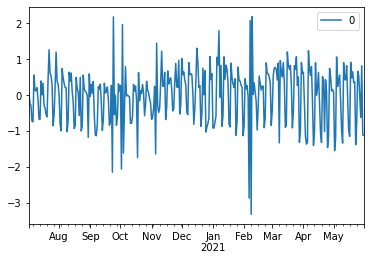

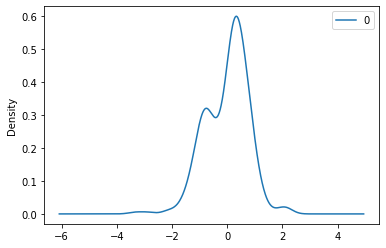

                0
count  334.000000
mean    -0.003663
std      0.775374
min     -3.325013
25%     -0.601491
50%      0.158513
75%      0.513665
max      2.188553
predicted=1.195922, expected=1.986038
predicted=1.209878, expected=1.753259
predicted=1.223575, expected=2.012817
predicted=1.357152, expected=1.162152
predicted=1.149314, expected=-0.310733
predicted=0.755528, expected=-0.365217
predicted=0.710629, expected=1.577223
predicted=1.206591, expected=1.230224
predicted=1.042110, expected=1.216518
predicted=1.094592, expected=1.718788
predicted=1.252668, expected=0.991033
predicted=1.050770, expected=-0.050205
predicted=0.774216, expected=-0.597241
predicted=0.580459, expected=1.062407
predicted=1.022458, expected=1.479224
predicted=1.067943, expected=0.044971
predicted=0.659899, expected=1.051138
predicted=0.998221, expected=1.133928
predicted=0.962926, expected=-0.508849
predicted=0.485758, expected=-0.688681
predicted=0.424232, expected=1.174645
predicted=0.914839, expected=1.479

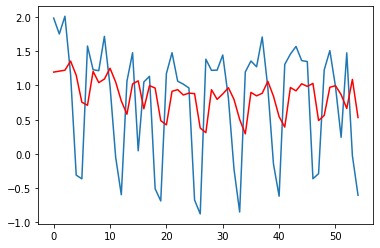

In [32]:
# fit an ARIMA model and plot residual errors
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
# fit model
series = series.astype('float64')
model = ARIMA(series, order=(0,1,2))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np
import itertools
from itertools import chain
X = series.values.astype('float64')

# prepare training dataset (280 training observations and 55 testing observations)
train, test = X[:280], X[280:] 
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('MAE score: %.3f' % mae)
r2 = r2_score(test, predictions)
print('R2 score: %.3f' % r2)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


                   y
2020-07-01  0.111164
2020-07-02  0.171094
2020-07-03 -0.083066
2020-07-04 -0.270840
2020-07-05 -0.809781
...              ...
2021-05-27  0.984104
2021-05-28  0.242404
2021-05-29  1.477272
2021-05-30 -0.026788
2021-05-31 -0.605924

[335 rows x 1 columns]


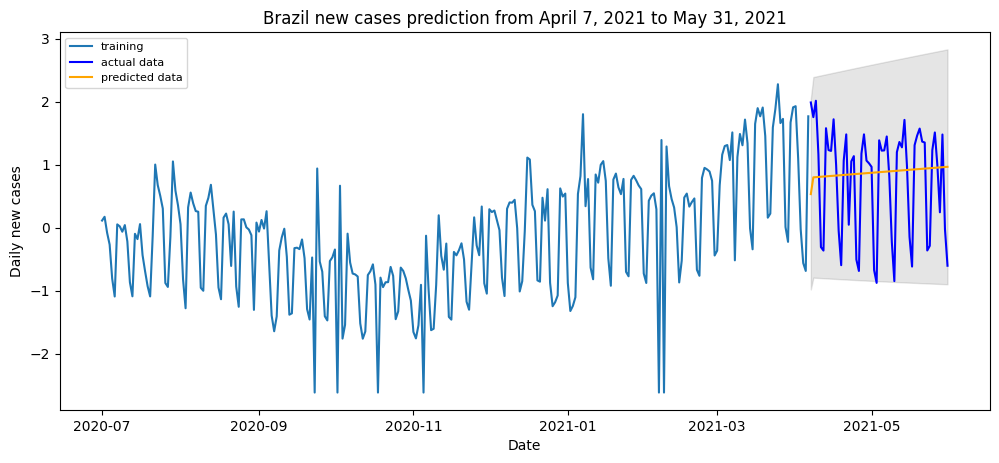

In [33]:
import pandas as pd
from statsmodels.tsa.stattools import acf 
import matplotlib.pyplot as plt
from scipy.special import inv_boxcox

print(series)
train1 = series.iloc[0:280]
idx1 = pd.date_range("2020-07-01", periods=280)
train1.index = idx1

test1 = series.iloc[280:]
idx2 = pd.date_range("2021-04-07", periods=55)
test1.index = idx2


# Forecast
fc, se, conf = model_fit.forecast(55, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test1.index)
lower_series = pd.Series(conf[:, 0], index=test1.index)
upper_series = pd.Series(conf[:, 1], index=test1.index)
fig = plt.figure(figsize=(12,5), dpi=100)
plt.plot(train1, label='training')
plt.plot(test1, color = 'blue', label='actual data')
plt.plot(fc_series, color = 'orange',label='predicted data')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Brazil new cases prediction from April 7, 2021 to May 31, 2021')
plt.xlabel('Date')
plt.ylabel('Daily new cases')
plt.legend(loc='upper left', fontsize=8)
plt.show()
